# Telco Customer Churn Analysis

### Import Libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# Common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

### Load the Data File

In [5]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [6]:
# Load the top 5 records of the dataset
data.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#No of records and attributes
data.shape 

(7043, 21)

In [8]:
#Attributes
data.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# Get the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Get the data types of the attributes
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the data type of TotalCharges is object, let's convert it to a numerical feature (float).

In [11]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [12]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for missing values

In [13]:
# Check if there are any missing values in the dataset
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [14]:
# Checking the sum of missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing records from TotalCharges.

In [15]:
# Let's view the missing records
data[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of the missing records are very low (0.16%), deleting the  missing records won't have an affect on the dataframe.

In [16]:
# Delete the missing records
data.dropna(inplace = True)

In [17]:
# Resetting index after records deletion
data.reset_index()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
# Since we deleted 11 records, we now have only 7032 rows
data.shape

(7032, 21)

In [19]:
# Let's drop 'customerID' because it has no impact on the dataframe
data.drop(['customerID'], axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Get statistical information on numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Variable Analysis

In [21]:
# Renaming the data values of "SeniorCitizen"
senior_column = {0 : "No", 1 : "Yes"}
data["SeniorCitizen"].replace(senior_column, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Get categorical variables
categoricalVar_List = []
for i in data.columns:
    if (data[i].dtypes == 'object'):
        categoricalVar_List.append(i)

print("Categorical Variables : ")
print(categoricalVar_List)

Categorical Variables : 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:
# Get numerical variables
numericalVar_List = []
for x in data.columns:
    if(data[x].dtypes == 'int64' or data[x].dtypes == 'float64'):
        numericalVar_List.append(x)

print("Numerical Variable : ")
print(numericalVar_List)

Numerical Variable : 
['tenure', 'MonthlyCharges', 'TotalCharges']


In [24]:
# Let's check the number of unique values for each categorical variables
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print("Unique values in", i, "-", data[i].nunique())

Unique values in gender - 2
Unique values in SeniorCitizen - 2
Unique values in Partner - 2
Unique values in Dependents - 2
Unique values in PhoneService - 2
Unique values in MultipleLines - 3
Unique values in InternetService - 3
Unique values in OnlineSecurity - 3
Unique values in OnlineBackup - 3
Unique values in DeviceProtection - 3
Unique values in TechSupport - 3
Unique values in StreamingTV - 3
Unique values in StreamingMovies - 3
Unique values in Contract - 3
Unique values in PaperlessBilling - 2
Unique values in PaymentMethod - 4
Unique values in Churn - 2


In [25]:
# Let's check the number of values for each unique value
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print(i, "\n")
        print(data[i].value_counts(), "\n")

gender 

Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen 

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype:

In [26]:
# Renaming the data values of "PaymentMethod"
payment_column = {"Electronic check": "E-Check", "Mailed check":"Mailed Check", "Bank transfer (automatic)" : "Bank Transfer", "Credit card (automatic)" : "Credit Card"}
data["PaymentMethod"].replace(payment_column, inplace = True)
data["PaymentMethod"].head()

0          E-Check
1     Mailed Check
2     Mailed Check
3    Bank Transfer
4          E-Check
Name: PaymentMethod, dtype: object

In [27]:
# Created a copy because I don't want to make any changes to the original list
categoricalVar_List_copy = categoricalVar_List.copy()
categoricalVar_List_copy.remove('Churn')

### Distribution of Categorical Features

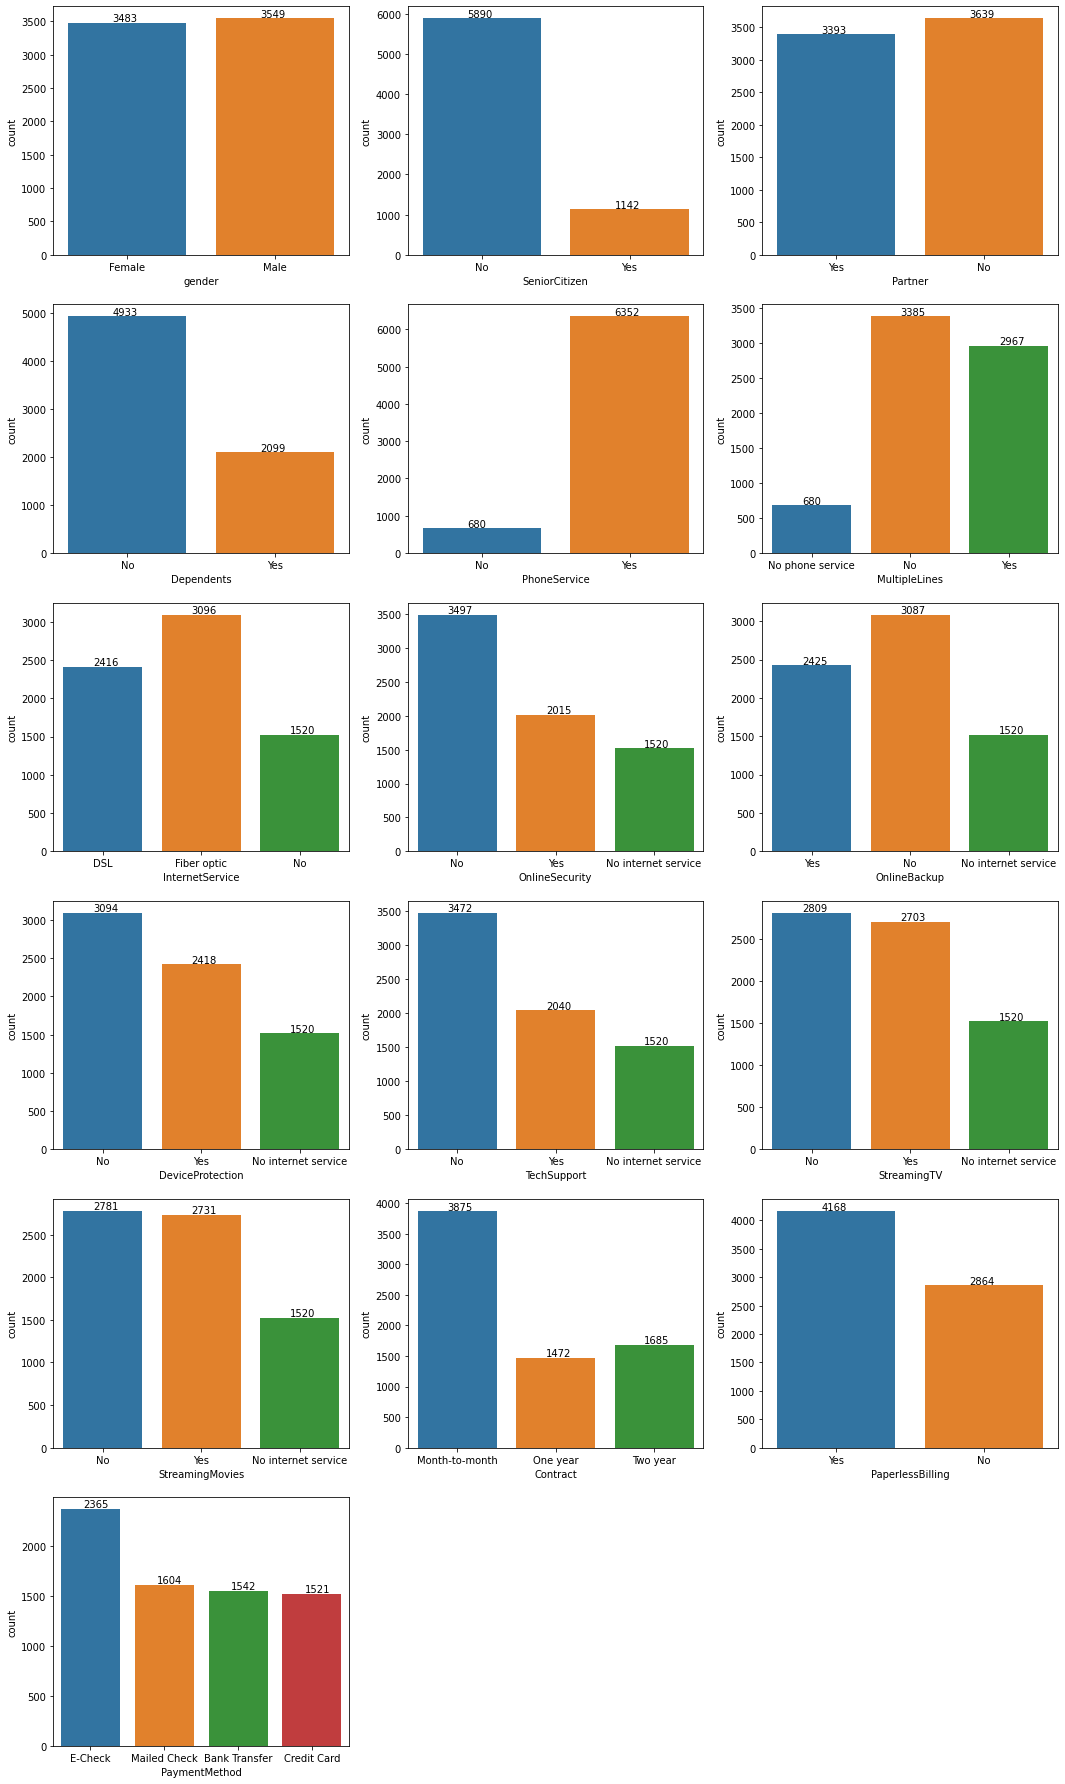

In [28]:
plt.figure(figsize=(18,32))
for i, j in enumerate(categoricalVar_List_copy):
    plt.subplot(6,3, i+1)
    ax = sns.countplot(x = j, data = data)
    # Display the count on the graph
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+20), fontsize = 10)

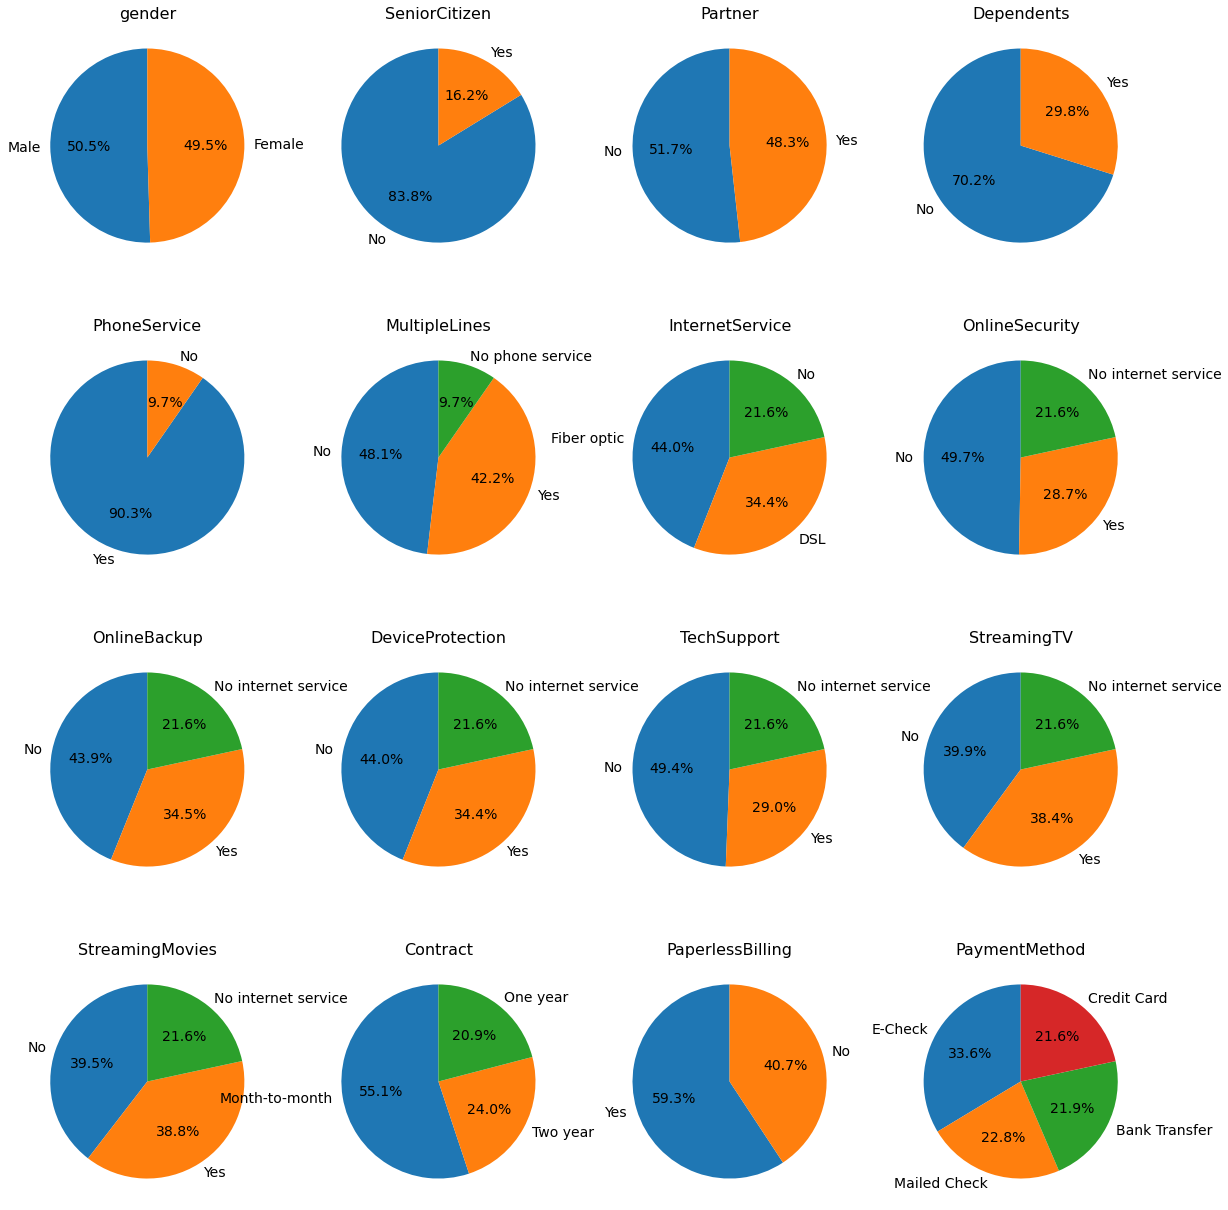

In [29]:
plt.figure(figsize=(20,22))
i = 0
for j in categoricalVar_List_copy:
    plt.subplot(4,4, i+1)
    plt.pie(data[j].value_counts(), labels = data[j].value_counts().index, startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
    plt.title(f'{j}', fontsize = 16)
    i+=1

### Distribution of Numerical Features

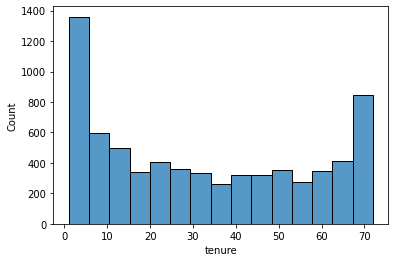

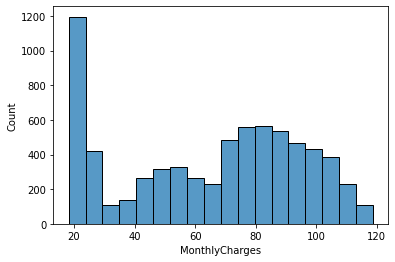

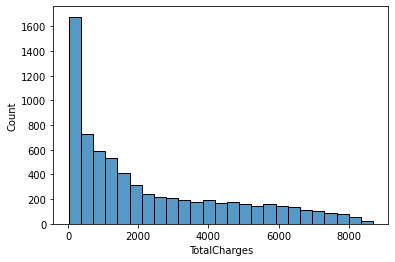

In [30]:
for i, j in enumerate(numericalVar_List):
    plt.figure(i)
    sns.histplot(x = j, data = data)

### Distributon of Target Variable/ Class Attribute

Target Variable/ Class Attribute - Churn

In [31]:
data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

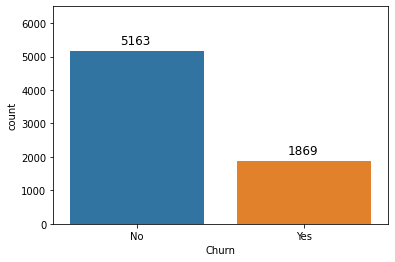

In [32]:
ax = sns.countplot(x = "Churn", data = data)
# y-axis limit
plt.ylim(0, 6500)
# Display the count on the graph
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+200), fontsize = 12)

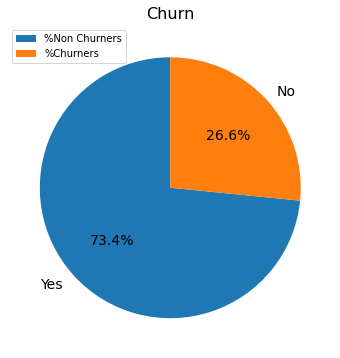

In [33]:
plt.figure(figsize=(8,6))
plt.pie(data["Churn"].value_counts(), labels = ['Yes','No'], startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
plt.title("Churn", fontsize = 16)
plt.legend(labels = ['%Non Churners', '%Churners'])
plt.show() 

<b><u>Plot insights:</u></b><br>
Non Churners - 73.4%<br>
Churners - 26.6%<br>
Ratio = 73:27<br>
We have a highly imbalanced dataset.

### Distribution of Categorical Features According to 'Churn'

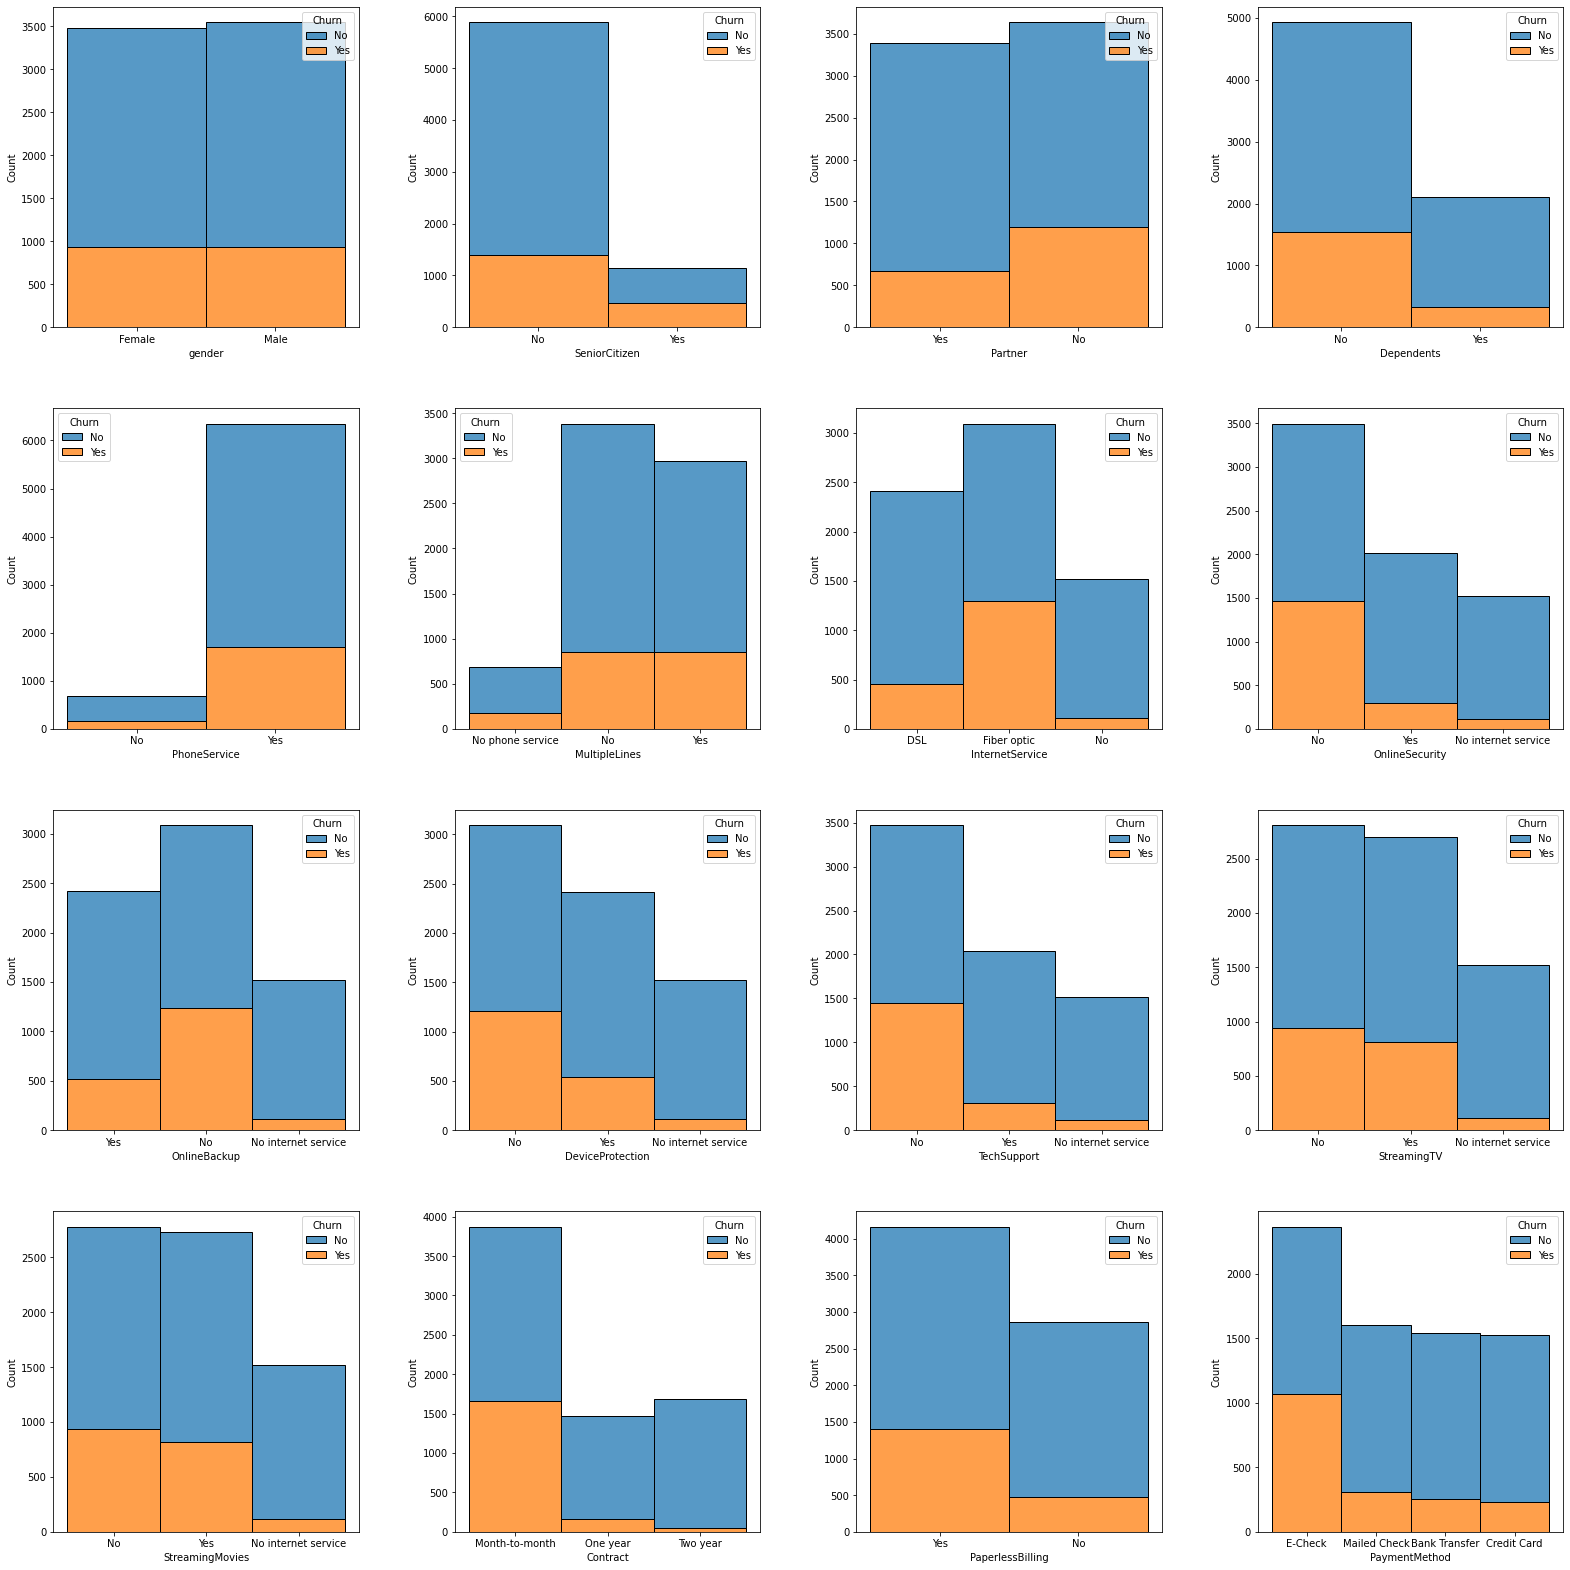

In [34]:
plt.figure(figsize = (23,23))
for i, j in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.subplot(4,4,i + 1)
    ax = sns.histplot(x = j, hue = 'Churn', data = data, multiple = "stack")
    plt.tight_layout(pad = 5.0)

<b><u>Plot insights:</u></b>
<li> Both genders have an equal churn rate.</li>
<li> Churn rate of Non Senior Citizens are much higher.</li>
<li> Single customers are more likely to churn than customers with partners.</li>
<li> Customers without any dependents are most likely to churn than customers with dependents.</li>
<li> High churn rate for customers with Phone Service.</li>
<li> Equal churn rate for customers with or without Multiple Lines.</li>
<li> Customers with Fiber Optic Internet Service has a high churn rate when compared to DSL and No Internet Service customers. This might suggest a dissatisfaction with this type of internet service.</li>
<li> Customers without Online Security are most likely to churn.</li>
<li> Customers without Online Backup are most likely to churn.</li>
<li> Customers without Device Protection are most likely to churn.</li>
<li> Customers without Tech Support has a higher churn rate.</li>
<li> Customers without Streaming TV service are most likely to churn.</li>
<li> Customers without Streaming Movies service are most likely to churn.</li>
<li> Notably higher churn rate can be seen from customers with Month-to-Month Contracts. </li>
<li> Customers with Paperless Billing are most likely to churn.</li>
<li> Electronic Check Payment method has a high churn rate than other payment methods.</li>

### Distribution of Numerical Features According to 'Churn'

#### Tenure

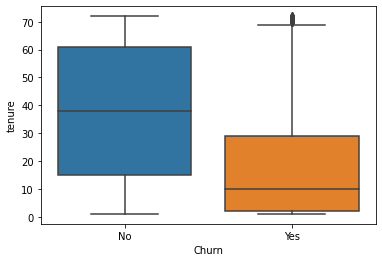

In [35]:
ax = sns.boxplot(x = data["Churn"], y = data["tenure"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have much lower tenure (median of ca. 10 months) compared to non-churners (median of ca. 38 months).</li>
<li>New customers are most likely to churn.</li>

#### Monthly Charges

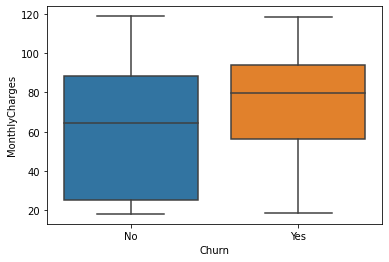

In [36]:
ax = sns.boxplot(x = data["Churn"], y = data["MonthlyCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have higher monthly charges (median of ca. 80 USD) compared to that of non-churners (median of ca. 65 USD).</li>

#### Total Charges

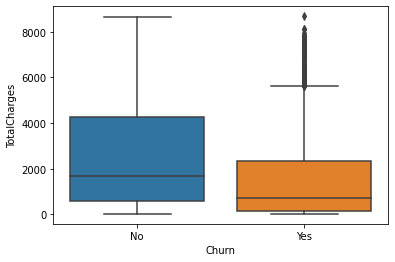

In [37]:
ax = sns.boxplot(x = data["Churn"], y = data["TotalCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Surprisingly churn rate is higher when Total Charges are lower.</li>

<b><u>Conclusion:</u></b><br>
TotalCharges is calculated using tenure and MonthlyCharges.
TotalCharges = tenure * MonthlyCharges

So when we compare the insights of the 3 numerical features => high MonthlyCharge at low tenure, results a low TotalCharge. Therefore, <b>High MonthlyCharge</b>, <b>Low tenure</b>, and <b>Low TotalCharge</b> results a <b>High Churn Rate</b>.


### Data Binning - Tenure Attribute

In [38]:
data["tenure"].nunique()

72

The tenure attribute has 72 unique values. So analyzing the data on the tenure attribute can be hectic due to the large number of records. Therefore, to gain a clear insight of the tenure attribute let's divide it into bins.

In [39]:
# Let's make a copy of our dataframe and make changes to the copied dataframe
data_copy = data.copy()

In [40]:
# Get the maximum tenure - 72 months
print(data_copy['tenure'].max())

72


In [41]:
# Grouping the tenure in bins of 12 months - equal width binning
labels = ["{0} - {1}".format(i, i + 12) for i in range(0, 72, 12)]
bins = [*range(0,73,12)] # * argument unpacking operator
print(labels)
print(bins)
data_copy['Tenure Period'] = pd.cut(data_copy["tenure"], bins = bins, labels = labels)

['0 - 12', '12 - 24', '24 - 36', '36 - 48', '48 - 60', '60 - 72']
[0, 12, 24, 36, 48, 60, 72]


In [42]:
data_copy['Tenure Period'].value_counts()

0 - 12     2175
60 - 72    1407
12 - 24    1024
24 - 36     832
48 - 60     832
36 - 48     762
Name: Tenure Period, dtype: int64

In [43]:
# Remove tenure attribute
data_copy.drop(columns = ['tenure'], axis = 1, inplace = True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,0 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,24 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,0 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,36 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0 - 12


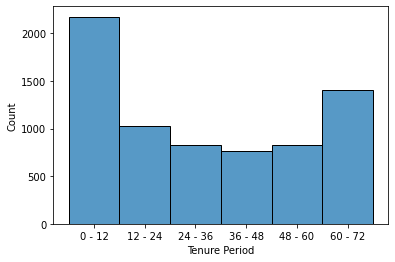

In [44]:
ax = sns.histplot(x = data_copy['Tenure Period'], data = data)

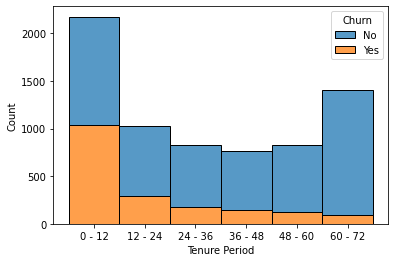

In [45]:
ax = sns.histplot(x = data_copy["Tenure Period"], hue = 'Churn', data = data_copy, multiple = "stack")

<b><u>Plot insights:</u></b><br>
Majority of the customers who had been a customer for a year or less churned. High churn rate within the first year suggests that the service offered does not meet the expectations of the new customers.

In [46]:
# Convert Churn to a binary numerical variable (Yes = 1 No = 0)
churn_column = {"No" : 0, "Yes" : 1}
data_copy["Churn"].replace(churn_column, inplace = True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,0,0 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,0,24 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,1,0 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,0,36 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,1,0 - 12


#### Convert categorical variable to numerical variables

In [47]:
gender_column = {"Female" : 0, "Male" : 1}
data_copy["gender"].replace(gender_column, inplace = True)

yesNo_list = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for i in yesNo_list:
    yn_column = {"No" : 0, "Yes" : 1}
    data_copy[i].replace(yn_column, inplace = True)

data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,0 - 12
1,1,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed Check,56.95,1889.50,0,24 - 36
2,1,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed Check,53.85,108.15,1,0 - 12
3,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank Transfer,42.30,1840.75,0,36 - 48
4,0,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0 - 12


### One-Hot Encoding - Using Pandas get_dummies function

In [48]:
# Converting remaining categorical variables into dummy variables
data_copy = pd.get_dummies(data_copy)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Tenure Period_0 - 12,Tenure Period_12 - 24,Tenure Period_24 - 36,Tenure Period_36 - 48,Tenure Period_48 - 60,Tenure Period_60 - 72
0,0,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0


In [49]:
# Now we will look at the correlation of all the attribuites with the expected class attribuite (Churn)
corr_matrix = data_copy.corr()
corr_Churn = corr_matrix["Churn"].sort_values(ascending = False)
corr_Churn

Churn                                   1.000000
Contract_Month-to-month                 0.404565
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
Tenure Period_0 - 12                    0.319628
InternetService_Fiber optic             0.307463
PaymentMethod_E-Check                   0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
MonthlyCharges                          0.192858
PaperlessBilling                        0.191454
SeniorCitizen                           0.150541
StreamingMovies_No                      0.130920
StreamingTV_No                          0.128435
StreamingTV_Yes                         0.063254
StreamingMovies_Yes                     0.060860
MultipleLines_Yes                       0.040033
Tenure Period_12 - 24                   0.019929
PhoneService                            0.011691
gender                                 -0.008545
MultipleLines_No pho

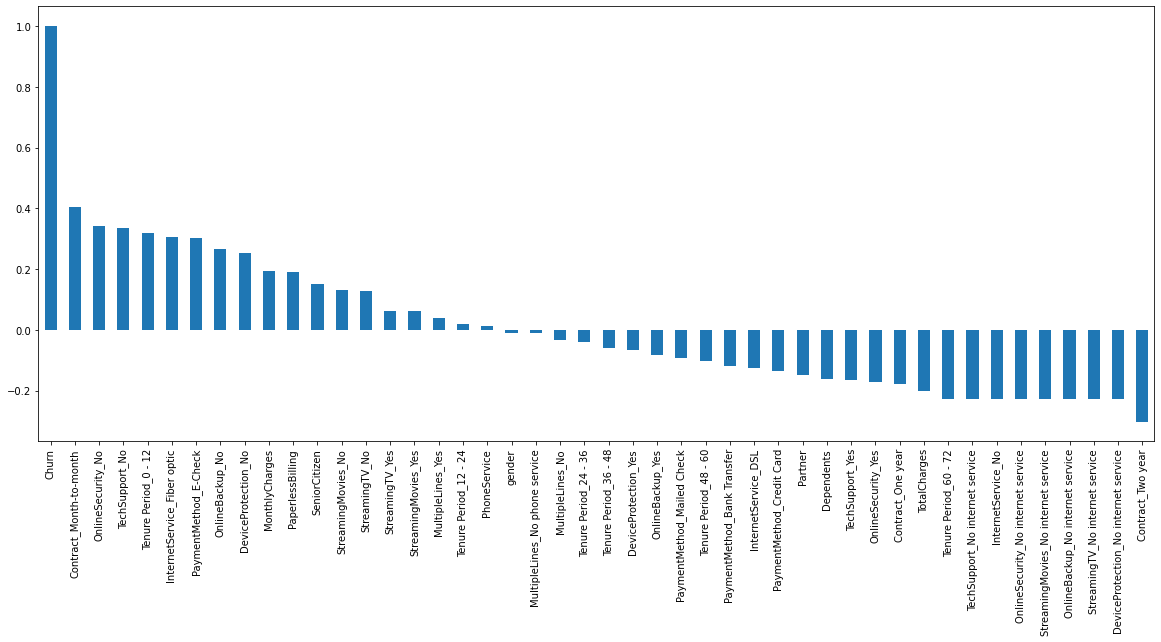

In [50]:
plt.figure(figsize=(20,8))
ax = corr_Churn.plot(kind='bar')

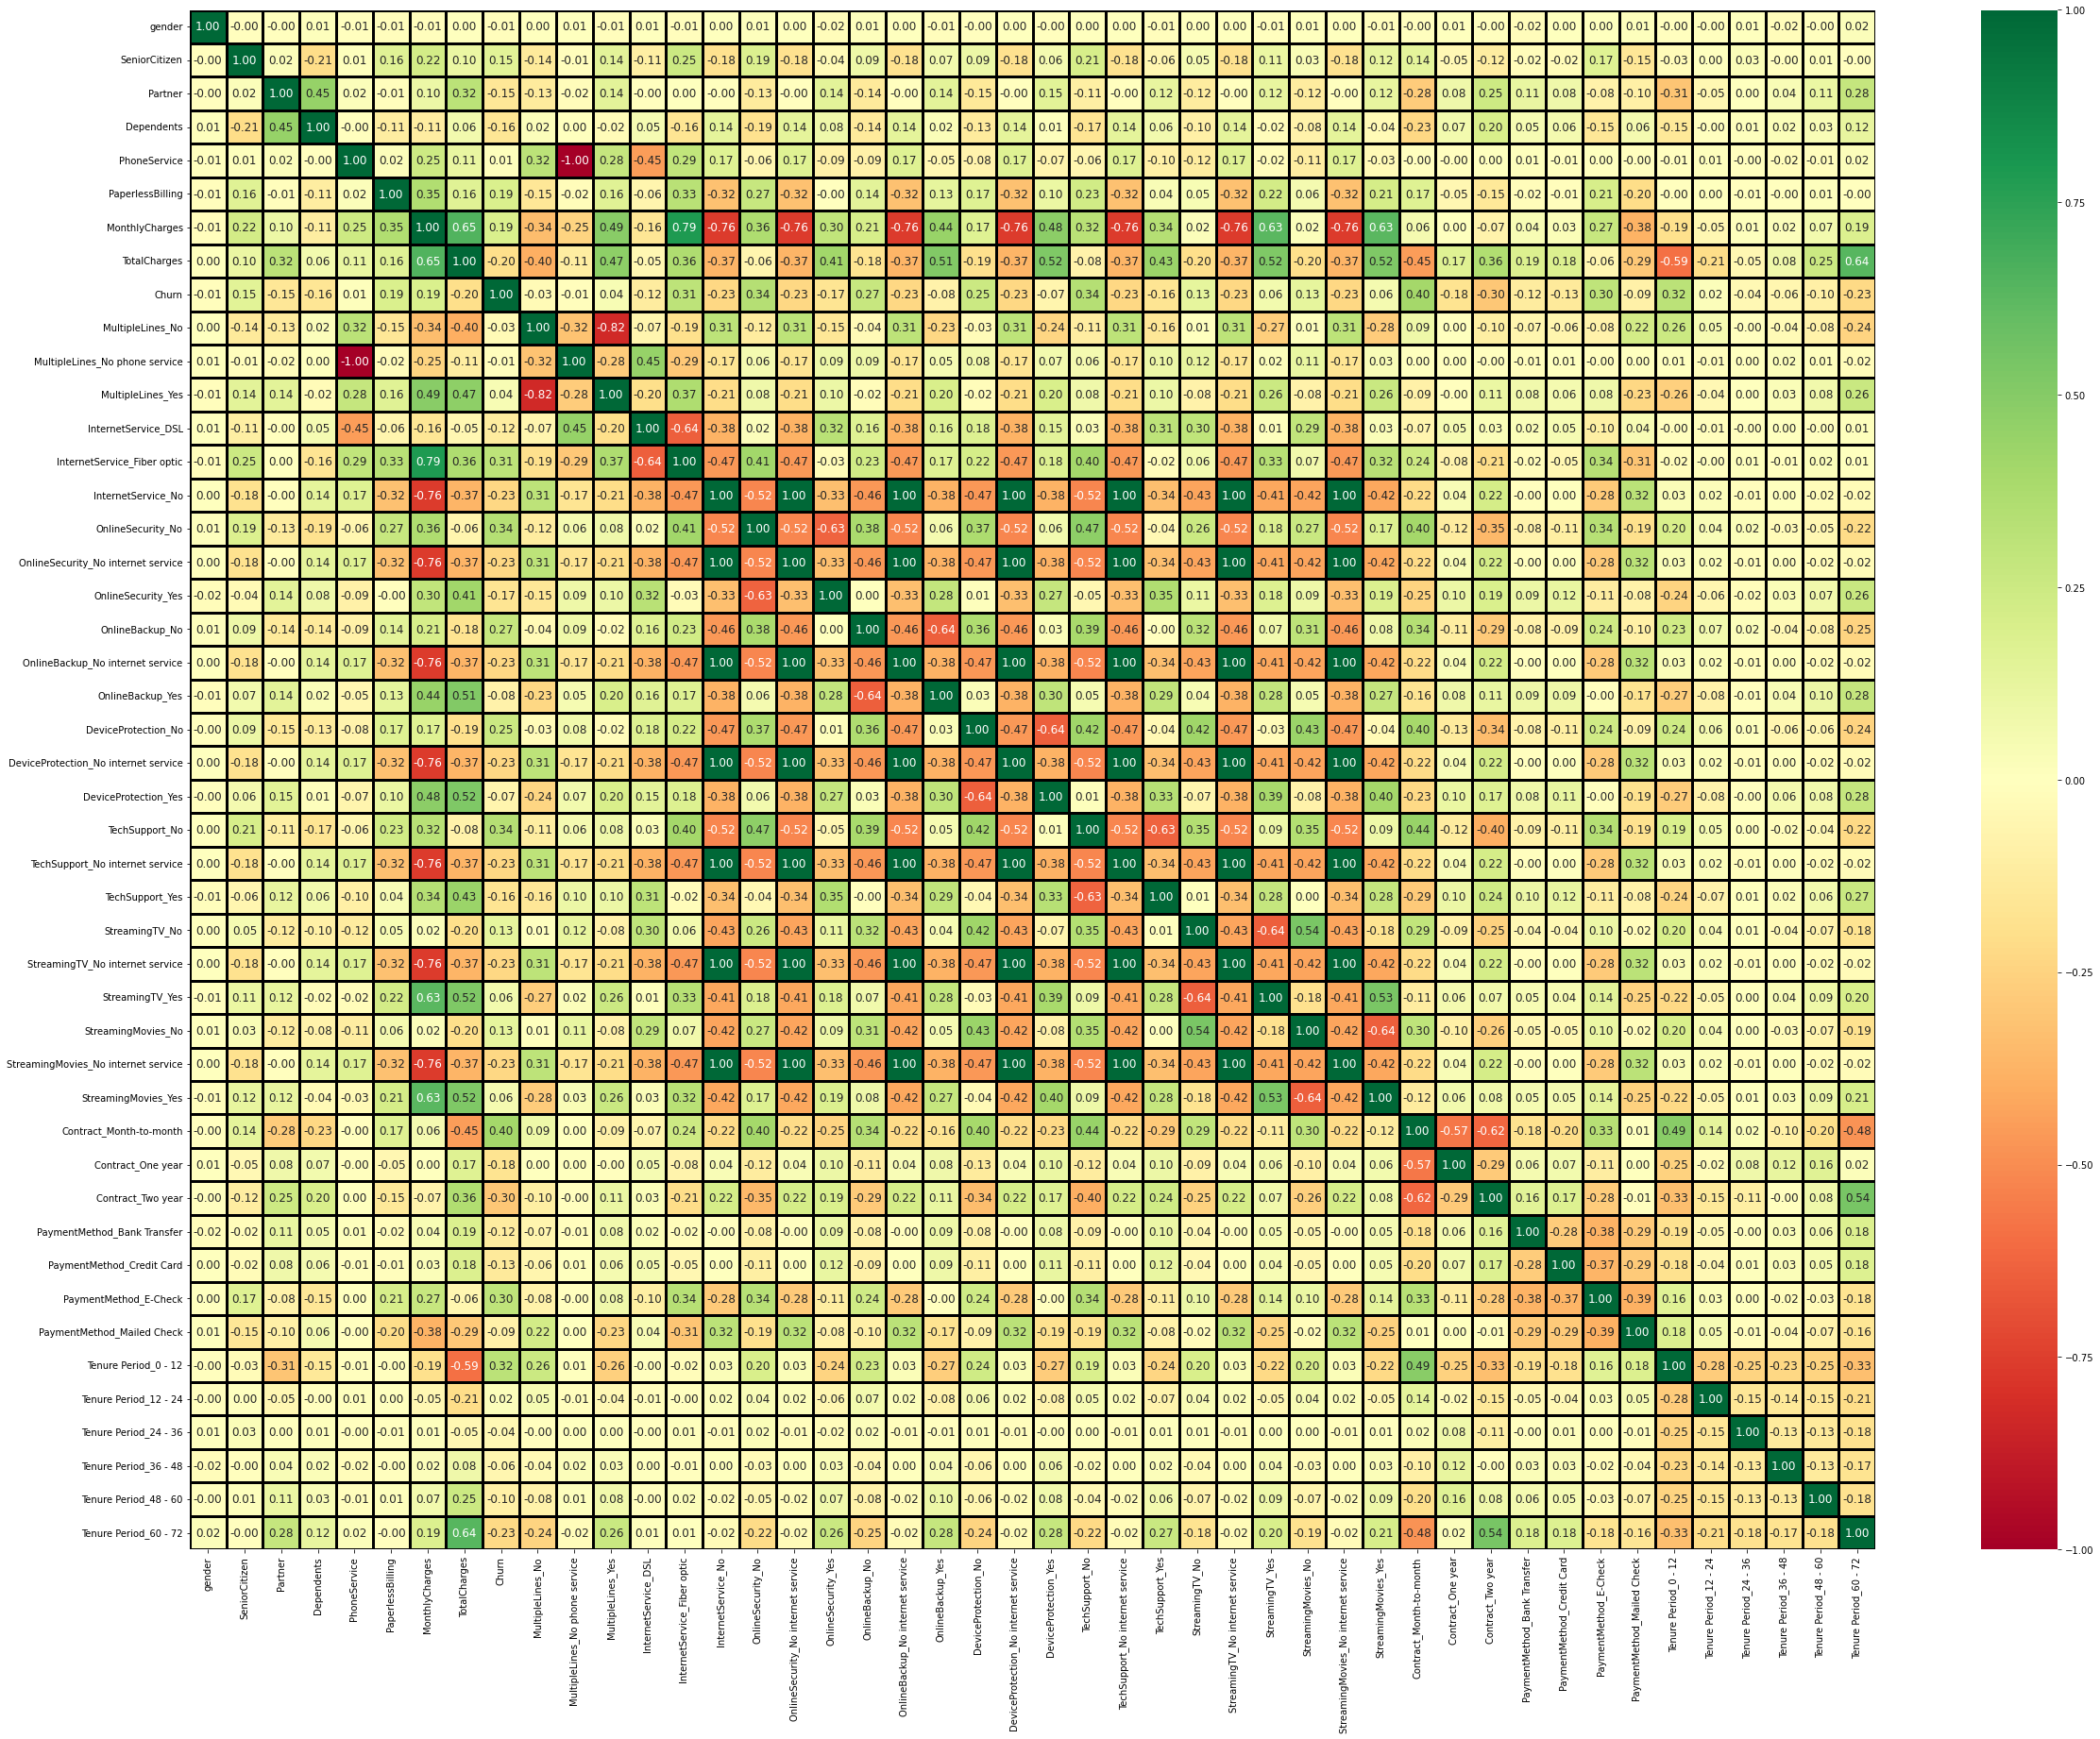

In [51]:
plt.figure(figsize = (40, 30))
ax = sns.heatmap(corr_matrix, annot = True, fmt='.2f', cmap="RdYlGn", linewidths = 3, linecolor = 'black', annot_kws={'size': 12})

<b><u>Plot Insight:</u></b>
<li><b>High Churn</b> - Month to month contracts, No online security, No Tech support, First year of subscriptions (Tenure period 0-12), Fibre Optics Internet, and Electronic Check Payments. </li>

<li><b>Low Churn</b> - 2-year contracts, Subscriptions without internet service, and 5-6 years customers.</li>

<li>Factors with No impact on Churn - Gender, Availability of PhoneService, and number of multiple lines.</li>

## Task 3 - Naïve Bayes Classifier 

In [52]:
X = data_copy.drop("Churn", axis = 1)
y = data_copy["Churn"]

#### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

# Splitting dataset into train set and test set, 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 45) (4922,)
(2110, 45) (2110,)


The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

In [54]:
from sklearn.naive_bayes import ComplementNB

classifier = ComplementNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

#from sklearn.naive_bayes import MultinomialNB
#nb = MultinomialNB()
#nb.fit(X_train, y_train)
#y_pred = nb.predict(X_test)

### Performance Measures

#### Accuracy 

In [55]:
from sklearn.metrics import accuracy_score

# ComplementNB
print(accuracy_score(y_test, prediction))

# MultinomialNB
#print(accuracy_score(y_test, y_pred))

0.6630331753554503


#### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

# ComplementNB

con_matrix = confusion_matrix(y_test, prediction)

TP = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TN = con_matrix[1][1]

TPR = TP / (TP + FN)
FPR = FN / (FN + TP)

print("Confusion Matrix - ")
print(con_matrix)
print("---------------------------")
print("According to ComplementNB Confusion Matrix")
print("---------------------------")
print("True Positives (TP) - " , TP)
print("False Positives (FP) - " , FP)
print("False Negatives (FN) - " , FN)
print("True Negatives (TN)- " , TN)
print("---------------------------")
print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
print("---------------------------")



# MultinomialNB
#cm = confusion_matrix(y_test, y_pred)

#TP =  cm[0][0]
#FP = cm[0][1]
#FN = cm[1][0]
#TN = cm[1][1]

#TPR = TP / (TP + FN)
#FPR = FN / (FN + TP)

#print("Confusion Matrix - ")
#print(cm)
#print("---------------------------")
#print("According to MultinomialNB Confusion Matrix")
#print("---------------------------")
#print("---------------------------") 
#print("True Positives (TP) - " , TP)
#print("False Positives (FP) - " , FP)
#print("False Negatives (FN) - " , FN)
#print("True Negatives (TN) - " , TN)
#print("---------------------------")
#print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
#print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
#print("---------------------------")


Confusion Matrix - 
[[976 573]
 [138 423]]
---------------------------
According to ComplementNB Confusion Matrix
---------------------------
True Positives (TP) -  976
False Positives (FP) -  573
False Negatives (FN) -  138
True Negatives (TN)-  423
---------------------------
True Positive Rate (TPR)-  0.88
False Positive Rate (FPR) -  0.12
---------------------------


#### Precision, recall, f1-score

In [57]:
from sklearn.metrics import classification_report

# ComplementNB
print(classification_report(y_test, prediction))

# MultinomialNB
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1549
           1       0.42      0.75      0.54       561

    accuracy                           0.66      2110
   macro avg       0.65      0.69      0.64      2110
weighted avg       0.76      0.66      0.68      2110



Precision is the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
<br>
Recall is the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.


<b><u>Observation</u></b>
<li>Classifier is better to find <b>class 0</b> over <b>class 1</b></li>

## Task 4 - Feature Selection

In [58]:
# Pearson correlation coefficient
corr = data_copy.corr()["Churn"].sort_values(ascending = False)
#corr

# absolute for positive values
abs_corr = abs(corr)
abs_corr.sort_values(ascending = False)

Churn                                   1.000000
Contract_Month-to-month                 0.404565
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
Tenure Period_0 - 12                    0.319628
InternetService_Fiber optic             0.307463
Contract_Two year                       0.301552
PaymentMethod_E-Check                   0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
StreamingTV_No internet service         0.227578
InternetService_No                      0.227578
OnlineSecurity_No internet service      0.227578
StreamingMovies_No internet service     0.227578
OnlineBackup_No internet service        0.227578
TechSupport_No internet service         0.227578
DeviceProtection_No internet service    0.227578
Tenure Period_60 - 72                   0.226078
TotalCharges                            0.199484
MonthlyCharges                          0.192858
PaperlessBilling    

#### Top 2 Features

In [59]:
# Top 2 features
# random threshold for features to keep
relevant_features_2 = abs_corr[abs_corr > 0.34]
relevant_features_2.sort_values(ascending = False)

Churn                      1.000000
Contract_Month-to-month    0.404565
OnlineSecurity_No          0.342235
Name: Churn, dtype: float64

We can see that the top 2 features w.r.t "Churn" based on absolute values of the corelation are Contract_Month-to-month and OnlineSecurity_No. Therefore, let's drop other features apart from these two.

In [60]:
# Data Set 1 - Top 2 features
dataset1 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","Churn"]]
dataset1.head()

,Contract_Month-to-month,OnlineSecurity_No,Churn
0,1,1,0
1,0,0,0
2,1,0,1
3,0,0,0
4,1,1,1


In [61]:
# Let's check the correlation of the selected features with each other
# The features should be uncorrelated with each other
# If they are correlated then we need to keep only one and drop the other
corr_top2 = dataset1.corr()
corr_top2 #Features aren't higlhy correlated

,Contract_Month-to-month,OnlineSecurity_No,Churn
Contract_Month-to-month,1.000000,0.402548,0.404565
OnlineSecurity_No,0.402548,1.000000,0.342235
Churn,0.404565,0.342235,1.000000


#### Top 5 Features

In [62]:
# Top 5 features
# random threshold for features to keep
relevant_features_5 = abs_corr[abs_corr > 0.307]
relevant_features_5.sort_values(ascending = False)

Churn                          1.000000
Contract_Month-to-month        0.404565
OnlineSecurity_No              0.342235
TechSupport_No                 0.336877
Tenure Period_0 - 12           0.319628
InternetService_Fiber optic    0.307463
Name: Churn, dtype: float64

We can see that the top 5 features w.r.t "Churn" based on absolute values of the corelation are Contract_Month-to-month and OnlineSecurity_No, TechSupport_No,Tenure Period_0 - 12, and InternetService_Fiber optic. Therefore, let's drop other features apart from these.

In [63]:
# Data Set 2 - Top 5 features
dataset2 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","TechSupport_No","Tenure Period_0 - 12","InternetService_Fiber optic", "Churn"]]
dataset2.head()

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,Tenure Period_0 - 12,InternetService_Fiber optic,Churn
0,1,1,1,1,0,0
1,0,0,1,0,0,0
2,1,0,1,1,0,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [64]:
# Now let's check the correlation among the selected features
# If any of these are hoghly correlated with each other let's drop one
corr_top5 = dataset2.corr()
corr_top5 #Here none of the features are highly correlated

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,Tenure Period_0 - 12,InternetService_Fiber optic,Churn
Contract_Month-to-month,1.000000,0.402548,0.438473,0.492052,0.243014,0.404565
OnlineSecurity_No,0.402548,1.000000,0.470113,0.196529,0.411006,0.342235
TechSupport_No,0.438473,0.470113,1.000000,0.193915,0.401869,0.336877
Tenure Period_0 - 12,0.492052,0.196529,0.193915,1.000000,-0.021441,0.319628
InternetService_Fiber optic,0.243014,0.411006,0.401869,-0.021441,1.000000,0.307463
Churn,0.404565,0.342235,0.336877,0.319628,0.307463,1.000000


#### Top 10 Features

In [65]:
# Top 10 features
# random threshold for features to keep
relevant_features_10 = abs_corr[abs_corr > 0.25]
relevant_features_10.sort_values(ascending = False)

Churn                          1.000000
Contract_Month-to-month        0.404565
OnlineSecurity_No              0.342235
TechSupport_No                 0.336877
Tenure Period_0 - 12           0.319628
InternetService_Fiber optic    0.307463
Contract_Two year              0.301552
PaymentMethod_E-Check          0.301455
OnlineBackup_No                0.267595
DeviceProtection_No            0.252056
Name: Churn, dtype: float64

In [66]:
# Data Set 3 - Top 10 features
dataset3 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","TechSupport_No","Tenure Period_0 - 12","InternetService_Fiber optic","Contract_Two year","PaymentMethod_E-Check","OnlineBackup_No","DeviceProtection_No","Churn"]]
dataset3.head()

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,Tenure Period_0 - 12,InternetService_Fiber optic,Contract_Two year,PaymentMethod_E-Check,OnlineBackup_No,DeviceProtection_No,Churn
0,1,1,1,1,0,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,0,1,1,1,1


In [67]:
# Now let's check the correlation among the selected features
# If any of these are hoghly correlated with each other let's drop one
corr_top10 = dataset3.corr()
corr_top10

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,Tenure Period_0 - 12,InternetService_Fiber optic,Contract_Two year,PaymentMethod_E-Check,OnlineBackup_No,DeviceProtection_No,Churn
Contract_Month-to-month,1.000000,0.402548,0.438473,0.492052,0.243014,-0.621933,0.330879,0.338126,0.396876,0.404565
OnlineSecurity_No,0.402548,1.000000,0.470113,0.196529,0.411006,-0.352447,0.335854,0.378167,0.371496,0.342235
TechSupport_No,0.438473,0.470113,1.000000,0.193915,0.401869,-0.397788,0.338529,0.385055,0.419653,0.336877
Tenure Period_0 - 12,0.492052,0.196529,0.193915,1.000000,-0.021441,-0.333850,0.160530,0.233228,0.239267,0.319628
InternetService_Fiber optic,0.243014,0.411006,0.401869,-0.021441,1.000000,-0.209965,0.335763,0.227363,0.217449,0.307463
Contract_Two year,-0.621933,-0.352447,-0.397788,-0.333850,-0.209965,1.000000,-0.281147,-0.287128,-0.338520,-0.301552
PaymentMethod_E-Check,0.330879,0.335854,0.338529,0.160530,0.335763,-0.281147,1.000000,0.236414,0.239173,0.301455
OnlineBackup_No,0.338126,0.378167,0.385055,0.233228,0.227363,-0.287128,0.236414,1.000000,0.361238,0.267595
DeviceProtection_No,0.396876,0.371496,0.419653,0.239267,0.217449,-0.338520,0.239173,0.361238,1.000000,0.252056
Churn,0.404565,0.342235,0.336877,0.319628,0.307463,-0.301552,0.301455,0.267595,0.252056,1.000000


We can see that only Contract_Month-to-month, and Contract_Two year are highly correlated (-0.621933). So we have to select one and drop the other.<br>
Let's keep Contract_Month-to-month since its correlation with Churn is higher than that of Contract_Two year.

In [68]:
dataset3 = dataset3.drop("Contract_Two year", axis = 1)
dataset3.head()

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,Tenure Period_0 - 12,InternetService_Fiber optic,PaymentMethod_E-Check,OnlineBackup_No,DeviceProtection_No,Churn
0,1,1,1,1,0,1,0,1,0
1,0,0,1,0,0,0,1,0,0
2,1,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1


## Task 5 - Run Naïve Bayes Classifier on the 3 Data Sets

In [69]:
# Function to run naive bayes on the 3 datasets
def naive_bayes(X,Y):
    
    # Splitting dataset into train set and test set, 70/30 train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    
    # training model using naive bayes - ComplementNB() 
    classifier = ComplementNB()
    classifier.fit(X_train, y_train)
    
    # testing the model, getting prediction
    prediction = classifier.predict(X_test)
    
    con_matrix = confusion_matrix(y_test, prediction)
    
    TP = con_matrix[0][0]
    FP = con_matrix[0][1]
    FN = con_matrix[1][0]
    TN = con_matrix[1][1]

    TPR = TP / (TP + FN)
    FPR = FN / (FN + TP)
    
    print("-----------------------------------------------------")
    print("ComplementNB")
    print("-----------------------------------------------------")
    print("Accuracy:", accuracy_score(y_test, prediction))
    print("-----------------------------------------------------")
    print(classification_report(y_test, prediction))
    print("-----------------------------------------------------")
    print("Confusion Matrix - ")
    print("")
    print(con_matrix)
    print("-----------------------------------------------------")
    print("According to ComplementNB Confusion Matrix - ")
    print("")
    print("True Positives (TP) - " , TP)
    print("False Positives (FP) - " , FP)
    print("False Negatives (FN) - " , FN)
    print("True Negatives (TN) - " , TN)
    print("-----------------------------------------------------")
    print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
    print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
    print("-----------------------------------------------------")

#### Naïve Bayes on Top 2 Features Data Set

In [70]:
X2 = dataset1.drop("Churn",axis = 1)
y2 = dataset1["Churn"]

naive_bayes(X2,y2)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.6507109004739337
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.82      0.78      1549
           1       0.26      0.17      0.21       561

    accuracy                           0.65      2110
   macro avg       0.50      0.50      0.49      2110
weighted avg       0.61      0.65      0.63      2110

-----------------------------------------------------
Confusion Matrix - 

[[1276  273]
 [ 464   97]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1276
False Positives (FP) -  273
False Negatives (FN) -  464
True Negatives (TN) -  97
-----------------------------------------------------
True Positive Rate (TPR)-  0.73
False Positive Rate (FPR) -  0.27
------------------------------------

<b><u>Observation -</u></b>
<li>We can notice a slight decrease (by 1.23%) in the <b>Accuracy</b> when compared to the original dataset.</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Increase in <b>Recall</b> ( by 19% ) and <b>F1-Score</b> ( by 0.05% ) can be noticed in class 0.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - A decrease can be noticed in other measures.

#### Naïve Bayes on Top 5 Features Data Set

In [71]:
X5 = dataset2.drop("Churn",axis = 1)
y5 = dataset2["Churn"]

naive_bayes(X5,y5)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.7099526066350711
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1549
           1       0.46      0.54      0.50       561

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.73      0.71      0.72      2110

-----------------------------------------------------
Confusion Matrix - 

[[1197  352]
 [ 260  301]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1197
False Positives (FP) -  352
False Negatives (FN) -  260
True Negatives (TN) -  301
-----------------------------------------------------
True Positive Rate (TPR)-  0.82
False Positive Rate (FPR) -  0.18
-----------------------------------

<b><u>Observation - </u></b>
<li>Here we can see an increase in <b>Accuracy</b> ( by 4.69% ) compared to the original dataset.</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Increase in <b>Recall</b> ( by 14% ) and <b>F1-Score</b> ( by 7% ) can be noticed in class 0. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - For class 1, a slight increase in <b>Precision</b> ( by 0.04% ) can be seen. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - A decrease can be noticed in other measures.

#### Naïve Bayes on Top 10 Features Data Set

In [72]:
X10 = dataset3.drop("Churn",axis = 1)
y10 = dataset3["Churn"]

naive_bayes(X10,y10)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.6511848341232227
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1549
           1       0.38      0.51      0.44       561

    accuracy                           0.65      2110
   macro avg       0.59      0.61      0.59      2110
weighted avg       0.69      0.65      0.66      2110

-----------------------------------------------------
Confusion Matrix - 

[[1088  461]
 [ 275  286]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1088
False Positives (FP) -  461
False Negatives (FN) -  275
True Negatives (TN) -  286
-----------------------------------------------------
True Positive Rate (TPR)-  0.80
False Positive Rate (FPR) -  0.20
-----------------------------------

<b><u>Observation - </u></b>
<li>A slight decrease ( by 1.2% ) in <b>Accuracy</b> can be noticed when compared to the original dataset, but when compared to the top 2 features dataset their is a slight increase ( by 0.4% )</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Only in class 0 <b>Recall</b> is increased by 0.7% and <b>F1-Score</b> is increased by 0.2%. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A decrease can be noticed in other measures.

<b><u>Conclusion</u></b>
<li>Overall the top 5 features dataset performed well.</li>

# Part 2 : Clustering

In [73]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Tenure Period_0 - 12,Tenure Period_12 - 24,Tenure Period_24 - 36,Tenure Period_36 - 48,Tenure Period_48 - 60,Tenure Period_60 - 72
0,0,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0


Let's select MonthlyCharges and tenure to apply for the k-means algorithm

In [74]:
X = data_copy[["MonthlyCharges", "TotalCharges"]]
X.shape

(7032, 2)

In [75]:
X.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


## Implementing K-Means Algorithm

In [76]:
# Perform K-means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [77]:
X["Cluster"] = y_kmeans

In [78]:
X.tail()

,MonthlyCharges,TotalCharges,Cluster
7038,84.80,1990.50,1
7039,103.20,7362.90,0
7040,29.60,346.45,1
7041,74.40,306.60,1
7042,105.65,6844.50,0


In [79]:
centers = kmeans.cluster_centers_
centers

array([[  91.22556247, 5364.20701292],
       [  53.62953672,  981.25434959]])

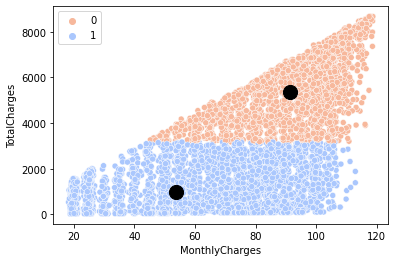

In [80]:
# Plot clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue= y_kmeans, palette = "coolwarm_r")

# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200);
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.show()

### Finding the optimal number of clusters

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [81]:
kmeans.inertia_

7922591998.086899

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

In [82]:
# For n_clusters = 3
kmeans3 = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans3.fit(X)
kmeans3.inertia_

3699647019.9296103

In [83]:
# For n_clusters = 4
kmeans4 = KMeans(n_clusters = 4, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans4.fit(X)
kmeans4.inertia_

2115135127.8367853

In [84]:
# For n_clusters = 5
kmeans5 = KMeans(n_clusters = 5, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans5.fit(X)
kmeans5.inertia_

1328633578.265296

In [85]:
# For n_clusters = 6
kmeans6 = KMeans(n_clusters = 6, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans6.fit(X)
kmeans6.inertia_

918858686.0698688

We cannot simply take the value of  𝑘  that minimizes the inertia, since it keeps getting lower as we increase the number of clusters (k) . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of  𝑘  and analyze the resulting curve:

### The Elbow's Method

In [86]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

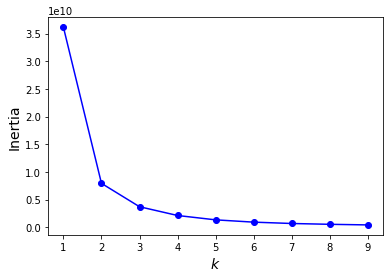

In [87]:
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

By the above plot we can see an elbow at k = 2, which indicates the optimal number of clusters for this dataset is 2.
<br><br> Now let's also use <b>The Silhouette Method</b> to calculate the optimal number of clusters.

### The Silhouette Method

In [89]:
from sklearn.metrics import silhouette_samples, silhouette_score

#silhouette_avg = []
for n_clusters in range(2,11):
    # Initialize the clusterer with n_clusters value and a random generator
    kmeans = KMeans (n_clusters = n_clusters, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    pred = kmeans.predict(X)
    centers = kmeans.cluster_centers_
        
    # The silhouette_score gives the average value for all the samples.
    score = silhouette_score (X, pred)
    #silhouette_avg.append(score)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7030413474106622
For n_clusters = 3, silhouette score is 0.6445639179466737
For n_clusters = 4, silhouette score is 0.6023952621932951
For n_clusters = 5, silhouette score is 0.5961880442085953
For n_clusters = 6, silhouette score is 0.5909346527682418
For n_clusters = 7, silhouette score is 0.5854331955852409
For n_clusters = 8, silhouette score is 0.5734783641682946
For n_clusters = 9, silhouette score is 0.5655882091089126
For n_clusters = 10, silhouette score is 0.556735901204838


So according to The Silhouette Method the optimal number of clusters for the dataset is also 2.

<b><u>Since we already know our target variable, let's check how accurate was our k-means algorithm</u></b>

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

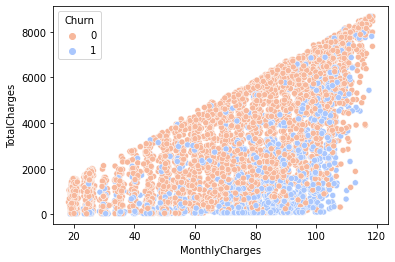

In [90]:
# Let's plot the scatter plot w.r.t target variable
sns.scatterplot(data = data_copy, x = "MonthlyCharges", y = "TotalCharges", hue = data_copy.Churn, palette = "coolwarm_r")

If we compare this plot, with the kmeans algorithm generated plot (cluster plot), we can see a difference between these two. This is most probably because the clusters weren't assigned accurately. <br>
But since there are also few similarities between the 2 plots we can assume that ;
<b>Cluster 0</b> most likely refers to <b>No</b> and,
<b>Cluster 1</b> referes to <b>Yes</b>

Now let's check the accuracy of the k-means algorithm.

In [91]:
y = data_copy["Churn"]
y.tail()

7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, dtype: int64

In [92]:
# Perform K-means algorithm, for n_clusters = 2
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(init='random', n_clusters=2, random_state=0)

In [93]:
labels = kmeans.labels_

# Calculate the number of samples correctly labeled
correct = sum(y == labels)

print("=> %d/%d were correctly labeled." % (correct, y.size))

Accuracy = (correct/float(y.size)*100)
print("=> Accuracy of 2 clusters: %d percent " %(Accuracy))

=> 3317/7032 were correctly labeled.
=> Accuracy of 2 clusters: 47 percent 


The accuracy is 47%. This proves why there was a huge difference between the 2 plots.

<b>Let's also find the accuracy when we increase the number of clusters.</b>

###### 3 Clusters

In [94]:
labels3 = kmeans3.labels_

# Calculate the number of samples correctly labeled
correct3 = sum(y == labels3)

print("=> %d/%d were correctly labeled." % (correct3, y.size))
Accuracy3 = (correct3/float(y.size)*100)
print("=> Accuracy of 3 clusters: %d percent " %(Accuracy3))

=> 1443/7032 were correctly labeled.
=> Accuracy of 3 clusters: 20 percent 


###### 4 Clusters

In [95]:
labels4 = kmeans4.labels_

# Calculate the number of samples correctly labeled
correct4 = sum(y == labels4)

print("=> %d/%d were correctly labeled." % (correct4, y.size))
Accuracy4 = (correct4/float(y.size)*100)
print("=> Accuracy of 4 clusters: %d percent " %(Accuracy4))

=> 2452/7032 were correctly labeled.
=> Accuracy of 4 clusters: 34 percent 


###### 5 Clusters

In [96]:
labels5 = kmeans5.labels_

# Number of samples correctly labeled
correct5 = sum(y == labels5)

print("=> %d/%d were correctly labeled." % (correct5, y.size))
Accuracy5 = (correct5/float(y.size)*100)
print("=> Accuracy of 5 clusters: %d percent " %(Accuracy5))

=> 889/7032 were correctly labeled.
=> Accuracy of 5 clusters: 12 percent 


We can see that when the number of clusters are increased the accuracy is decreased. So the optimal number of clusters is  definetely 2.

## Hierarchical Clustering

I will be using the Ward's Method to calculate the similarity between the two clusters. Ward’s method says that the distance between two clusters, is how much the sum of squares will increase when we merge them. With hierarchical clustering, the sum of squares starts out at zero (because every point is in its own cluster) and then grows as we merge clusters. Ward’s method keeps this growth as small as possible. <br><br>
Now, let's plot the Dendrogram to get the number of clusters for hierarchical clustering.

In [97]:
X = data_copy[["MonthlyCharges", "TotalCharges"]]

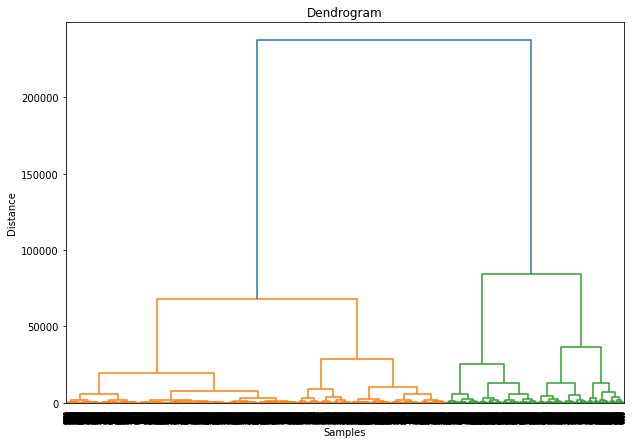

In [98]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
plt.xlabel("Samples")
plt.ylabel("Distance")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 100000 and cut the dendrogram. So we get 2 clusters

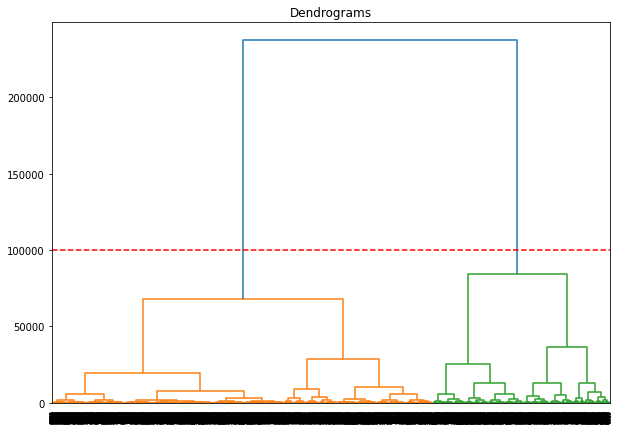

In [99]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y= 100000, color='r', linestyle='--')

#### Agglomerative Hierarchical clustering

In Agglomerative Hierarchical Clustering, initially, each data point is treated as a separate cluster in this clustering process. Similar clusters merge with other clusters at each iteration until one cluster or K clusters are produced. Simply, grouping small clusters into large ones.

In [100]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
hierarchical = cluster.fit_predict(X)
hierarchical

array([1, 1, 1, ..., 1, 1, 0])

In [101]:
X.tail(2)

,MonthlyCharges,TotalCharges
7041,74.40,306.6
7042,105.65,6844.5


In [102]:
X["Cluster"] = hierarchical
X.tail()

,MonthlyCharges,TotalCharges,Cluster
7038,84.80,1990.50,1
7039,103.20,7362.90,0
7040,29.60,346.45,1
7041,74.40,306.60,1
7042,105.65,6844.50,0


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

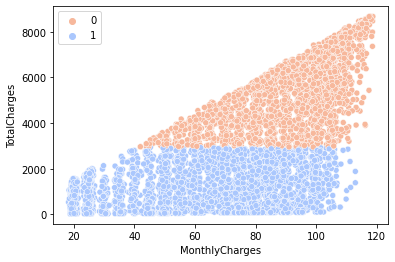

In [103]:
sns.scatterplot(data = X, x = "MonthlyCharges", y = "TotalCharges", hue = hierarchical, palette = "coolwarm_r")

Let's find the accuracy of the hierarchical clustering.

In [104]:
hie_labels = cluster.labels_

# Number of samples correctly labeled
hie_correct = sum(y == hie_labels)

print("=> %d/%d were correctly labeled." % (hie_correct, y.size))

hie_Accuracy = (hie_correct/float(y.size)*100)
print('=> Accuracy of hierarchical clustering for 2 clusters: %d ' %(hie_Accuracy))

=> 3389/7032 were correctly labeled.
=> Accuracy of hierarchical clustering for 2 clusters: 48 


Comparing with k-means we can see an increase in the accuracy by 1%. Since there is a slight increase we can say that hierarchical clustering performed well.

### K-Means vs Hierarchical Clustering

<li>The number of clusters should be known before using the K-means algorithm. However, with hierarchical clustering, we can simply determine the appropriate number of clusters by interpreting it in a dendrogram. </li><br>
<li>A noticeable difference was the time of computation; K-means algorithm computed faster. And hierarchical clustering did take some time to compute the results. Which means for larger dataset applying k-means is a good choice.</li><br>
<li>The hierarchical results are structured, interpretable, and informative. Unlike k-means, which produces unstructured results.</li>

## References 

Rashida Nasrin Sucky (Aug 27, 2020). Data Binning with Pandas Cut or Qcut Method. When You Are Looking for a Range Not an Exact Value, a Grade Not a Score. https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde

B. Chen (Jun 18, 2020). What is One-Hot Encoding and how to use Pandas get_dummies function. A complete One-Hot Encoding tutorial for beginners. https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

Okoh Anita (Aug 20, 2019). Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations. https://heartbeat.comet.ml/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

(05 Sep, 2020). Complement Naive Bayes (CNB) Algorithm. https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/

Abhini Shetye (Feb 11, 2019). Feature Selection with sklearn and Pandas. Introduction to Feature Selection methods and their implementation in Python. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

Mazen Ahmed (Nov 26, 2020).K-means Clustering in Python. https://python.plainenglish.io/k-means-clustering-in-python-9825a280f9cb

Prashant Banerjee. K-Means Clustering with Python. https://www.kaggle.com/prashant111/k-means-clustering-with-python

Abhishek Yadav. Kmeans clustering with Elbow Method and Silhouette https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette

Pulkit Sharma (May 27, 2019). A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/